No supervisado: los datos no están etiquetados. No contamos con un valor numérico que se corresponda.
Ejemplo: detección de anomalías.

Satelite que periodicamente baja a tierra a través de las telecomunicaciones con la estacion terrena, la telemetría en satélite donde se ven diferentes variables del sistema. 

Nosotros no sabemos si el comportamiento de ese satélite esta llevando a que se produza una falla o no. Solo tenemos los datos, los features que nos llegan por telemetría, pero queremos generar dos clusters donde se distinguen dos comportamientos distintivamente diferentes. Alguno de esos comportamientos se relaciona con alguna anomalia, y el otro con el comportamiento normal. Nosotros no conocemos, a priori, cual de los dos grupos/ clusters puede llevar a una falla. Por eso decimos que **queremos detectar una anomalía**. No contamos con las etiquetas.
___

K-Means
==
k-medias

Tenemos datos de entrada que no tenemos clasificados, y queremos formar clusters sin que sepamos a qué se corresponde cada uno de esos datos.
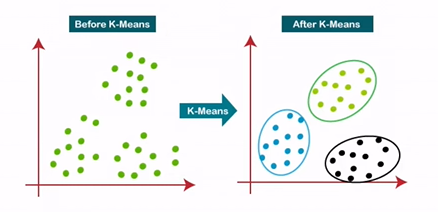

Para problemas de dimensionalidad alta: costoso computacionalmente
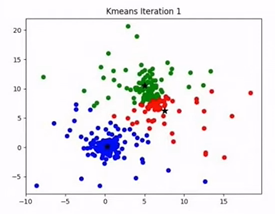 

según un número dado k de clusters que queremos usar, seteamos al azar k centroides. Inicializamos los centroides de manera aleatoria, y vemos según alguna métrica de distancia (ej la euclediana) a qué centroide se corresponde cada uno de los puntos. Después se recalculan los centroides para que se correspondan con la media de los nuevos subconjuntos.

El algoritmo es iterativo. Se finaliza la ejecución cuando:
- número máximo de iteraciones
- posición de los centroides no se mueven mucho

Ahí decimos que el algoritmo converge a una solución

La unica variacion que veremos para este algoritmo es trabajar con mini baches (subconjuntos de los datos) ==> me permite disminuir el tiempo de computación del programa. Obtenemos una solución ligeramente peor, pero al ser los rtamos comparables, ganamos mucho tiempo.

# Propagación por afinidad
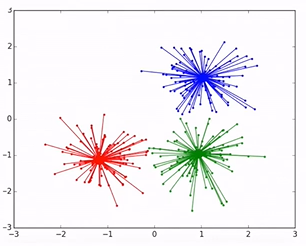
No definimos centroides o un número determinado de centroides en particular, sino que usamos algun punto de la distribución de ejemplo como los puntos que más representan a cada uno de los clusters.

Mediante mensajes que se envían, cada punto es asignado segun la afinidad a uno de estos puntos representativos de cada cluster. Eso se itera hasta la convergencia.

**Ventaja principal**: no necesitamos asignar un número de cluster predeterminado. El algoritmo se encarga de definirlo.

# Resonancia magnética & tomografía de positrones
Dependiendo de la técnica que se emplee para obtener las imágenes, hay diferentes resoluciones. Pensemos que queremos pasar las imagenes a través de un algoritmo ML que realice algún tipo de clasificación.
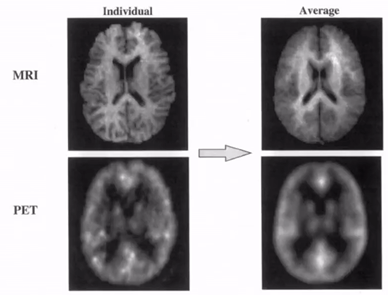

Dado que los features (que en este caso son los pixeles de la imagen) pueden tener una escala grande (desde el 0 al 255 para una imágen en escala de grises), muchas veces queremos preprocesar los datos para acotar el a¿rango de entrada de los features a nuestro modelo.

**ventaja**: 
- acotamos los rangos a un cierto intervalo que lo hace más manejable
- asignamos el mismo peso a todos los features

Las variaciones en zonas iluminadas tienen un rango de variacion y las oscuras tienen otras.

No sabemos cuáles de estos features son representativos para nuestro problema
***==> se ESTANDARIZAN, para que queden representadas como una variación con respecto a la media.***
sustraemos la media a la imagen. Eso alimenta nuestro modelo.
A su vez, podemos dividir por el desvío estandar, y de esa manera nos quedamos con un desvío estandar unitario

Esto tiene la ventaja de: todos los features de entrada tienen los mismos pesos, con lo cual se facilita
- la convergencia
- la deteccion de features más representativos para la resolución del problema

# K-means

0.7302382722834697


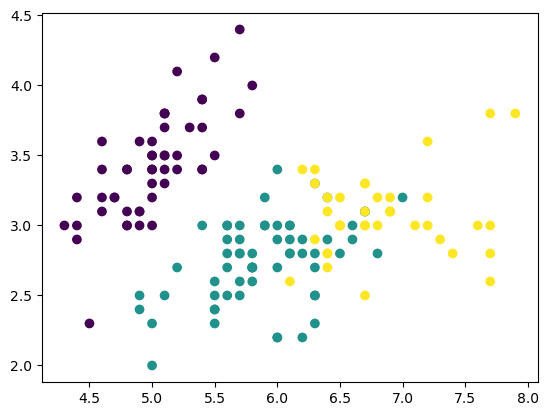

In [1]:
# importamos lo necesario: herramientas generales
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # nos quedamos con la clase kmeans
from sklearn import datasets
from sklearn import metrics

# nos quedamos con el problema de iris
iris = datasets.load_iris()

# Datos y etiquetas
datos = iris.data
etiquetas = iris.target

# --------------- Instanciamos la clase ---------------
# n_clusters es la cantidad de grupos que queremos
# c on max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
# acá están hardcodeadas
k_means = KMeans(n_clusters = 3, max_iter = 2000) 
k_means.fit(datos)

# predicciones del grupo al que cree que pertenece
predicciones = k_means.predict(datos)

# --------------- Función de metrics ---------------
# le metemos nuestras predicciones. Esta función está hecha para trabajar con 
# problemas de clustering. Nos da 1 cuando el ajuste es perfecto y 0 cuando es
# totalmente incorrecto. La ventaja es que no necesito especificar el número de k
# print(predicciones)
# podemos comparar los resultados predichos con las etiquetas que ya teniamos
# para ver cuan bien aprendio.
score = metrics.adjusted_rand_score(etiquetas, predicciones)

# El resultado es un 73% lo cual no es muy bueno
print(score)

plt.scatter(datos[:, 0], datos[:, 1], c = predicciones)

plt.show()

# help(KMeans)

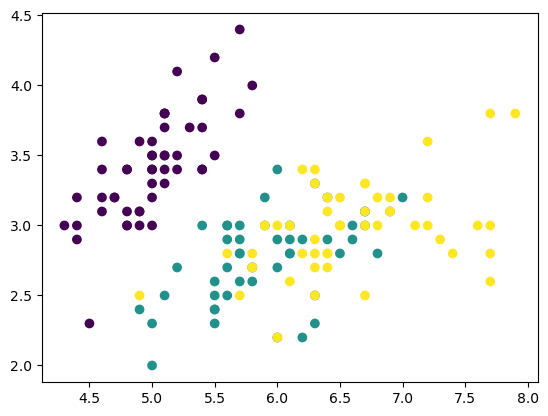

In [2]:
plt.scatter(datos[:, 0], datos[:, 1], c = etiquetas)

plt.show()

# vemos que están mucho más entrecruzados

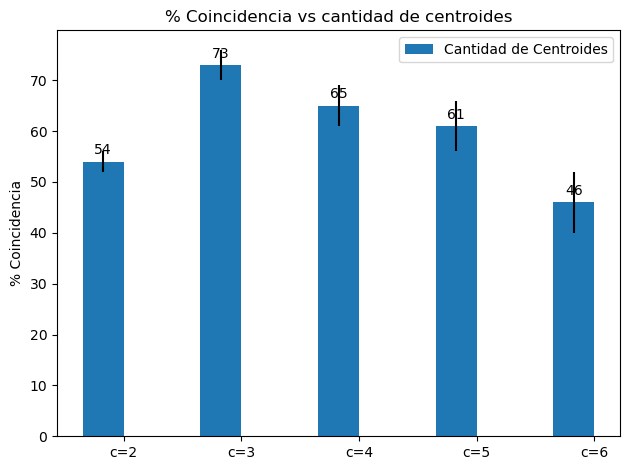

In [3]:
# acá tenemos un histograma
# estamos graficando el % de coincidencia en función de la cantidad de centroides elegidos
# los datos están hardcodeados --> no es de gran relevancia toda esta ejecución
# Uno no conoce el número de clusters reales --> ese es uno de los problemas
#   *   un tiene que correr varias veces el algoritmo con != k
#   *   y ver cuál es el número de coincidencia que tiene al centroide correcto

centroides_means, centroides_std = (54, 73, 65, 61, 46), (2, 3, 4, 5, 6)

ind = np.arange(len(centroides_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, centroides_means, width, yerr=centroides_std, label='Cantidad de Centroides')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Coincidencia')
ax.set_title('% Coincidencia vs cantidad de centroides')
ax.set_xticks(ind)
ax.set_xticklabels(('c=2', 'c=3', 'c=4', 'c=5', 'c=6'))
ax.legend()


def autolabel(rects, xpos='center'):
    ha = {'center': 'center'}
    offset = {'center': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (offset[xpos] * 3, 3),  # use 3 points offset
                    textcoords = "offset points",  # in both directions
                    ha = ha[xpos], va = 'bottom')

autolabel(rects1, "center")

fig.tight_layout()

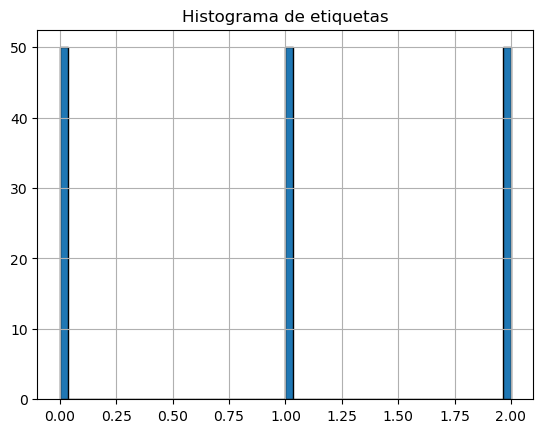

<Figure size 640x480 with 0 Axes>

In [4]:
###################################################################
plt.title('Histograma de etiquetas')
plt.hist(etiquetas, bins = 60, alpha = 1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

# las clases están equilibradas: 50 ejemplos en cada una de las clases. 50 ejemplos
# de cada tipo de flor

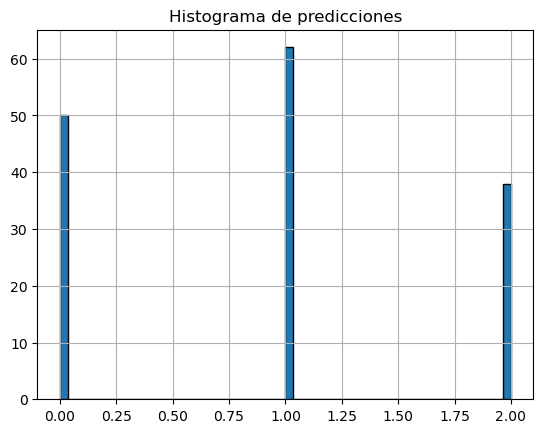

<Figure size 640x480 with 0 Axes>

In [5]:
###################################################################
plt.title('Histograma de predicciones')
plt.hist(predicciones, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

# Si ahora vemos nuestras etiquetas: los elementos de 1 siguen siendo 50 (cluster morado)
# algunos elementos del cluster 3 pasaron al cluster 2 ==> están mal clasificados
# este es un análisis posterior altamente recomendable de hacer

MiniBatch
==
Entonces: KMeans es costoso computacionalmente, especialmente el cálculo de la distancia de cada punto al centroide.

Esta es una de las soluciones posibles: usar la version del KMeans por MiniBatch.

Esto significa que en cada iteración no vamos a usar el conjunto total de todos los puntos, sino un subconjunto de todos esos puntos totales que tenemos ==> nos ahorramos muchos cálculos por cada iteración.

El score resultante es ligeramente peor. **Solamente ligeramente peor**, pero el tiempo de ejecución es **mucho** más rápido. Está muy buena para muchos ejemplos o dimensionalidad muy alta.

C:\Users\vguar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0.7570029149464148


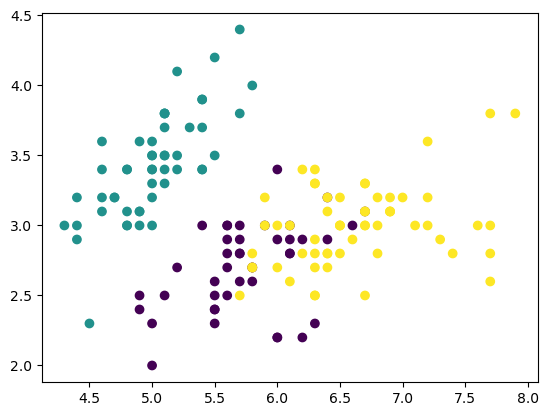

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# esta es la clase que usamos
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()

datos = iris.data
etiquetas = iris.target

# n_clusters es la cantidad de grupos que queremos
# con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = MiniBatchKMeans(n_clusters = 3, max_iter = 2000) 
k_means.fit(datos)

# predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(datos)

# print(predicciones)
# podemos comparar los resultados predichos con las etiquetas que ya teniamos
# para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)

# El resultado es un 73% lo cual no es muy bueno
print(score)
plt.scatter(datos[:, 0], datos[:, 1], c=predicciones)

plt.show()

AffinityPropagation
==
Algoritmo bastante más complejo conceptualmente que KMeans.
Buscar en la documentación de AffinityPropagation.

**Propagación por afinidad**: crea clusteres enviando mensajes entre pares de muestra hasta que se llega a una convergencia. 

Se identifican algunos ejemplares de nuestros datos que se identifican como los más representativos de otras muestras.

Entonces: los centroides son datos de nuestros clusteres. Trabaja de manera bastante diferente. Complejo matemáticamente. 

Estimated number of clusters: 3
0.8022085453675192


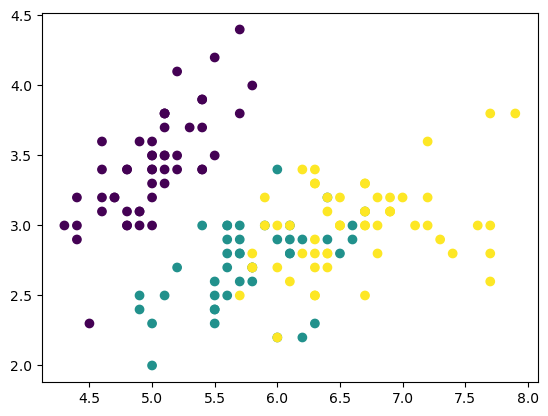

In [7]:
# El algoritmo SOLO estima la cantidad de clusteres que tiene nuestro problema
# no hay que hacer a priori un análisis exploratorio

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn import metrics

# Datos
iris = datasets.load_iris()
datos = iris.data
etiquetas = iris.target

# Preferencia: el número de ejemplares que se van a usar en el proceso de entrenamiento
#              tiene que ser el valor negativo de ejemplares que queremos usar (-)
# Dumping: amortiguamiento numérico para evitar oscilaciones
afinidad_por_propagacion = AffinityPropagation(preference = -50, damping = 0.5, random_state = None) 


af = afinidad_por_propagacion.fit(datos)

# Con esto nos quedamos con el número de clusters predicho por la clase
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

af.fit(datos)
predicciones = af.predict(datos)

# se obtiene muy buenos resultados (mejor que kmeans o minibatch)
score = metrics.adjusted_rand_score(etiquetas, predicciones)
print(score)

# Graficamos
plt.scatter(datos[:, 0], datos[:, 1], c = predicciones)
plt.show()
